#     Performance evaluation of Terapixel rendering in Cloud Computing

# Abstract

# Introduction


# Investigation idealogy
business understanding
data understanding
data preprocessing
methodology
EDA

In [126]:
!pip install pandasql

In [135]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot
from pandas import Series
from datetime import datetime
import statistics

In [136]:
df_gpu = pd.read_csv("gpu.csv")
df_app = pd.read_csv("application-checkpoints.csv")
df_task = pd.read_csv("task-x-y.csv")

In [142]:
# Display the columns of each dataframes with datatypes
print("---application-checkpoints.csv---")
print(df_app.dtypes)
print("-------------gpu.csv-------------")
print(df_gpu.dtypes)
print("-----------task-x-y.csv----------")
print(df_task.dtypes)

---application-checkpoints.csv---
timestamp    object
hostname     object
eventName    object
eventType    object
jobId        object
taskId       object
dtype: object
-------------gpu.csv-------------
timestamp          object
hostname           object
gpuSerial           int64
gpuUUID            object
powerDrawWatt     float64
gpuTempC            int64
gpuUtilPerc         int64
gpuMemUtilPerc      int64
dtype: object
-----------task-x-y.csv----------
taskId    object
jobId     object
x          int64
y          int64
level      int64
dtype: object


In [140]:
df_gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [61]:
df_app.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [62]:
df_gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [63]:
df_task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [64]:
df_gpu.shape

(1543681, 8)

In [65]:
df_gpu = df_gpu.drop_duplicates(keep=False)

In [66]:
df_app.shape

(660400, 6)

# DATA PREPROCESSING

In [67]:
TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
def timestamp_conv(df):
    """
    Converts a timestamp to datetime
    
    Parameters
    ----------
    df
        dataframe to convert to datetime
    ----------
    float
        converted timestamp
    """
    
    df = df.apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))    
    return(df)

In [68]:
def merge_check_task(df_checkpoints, df_tasks):
    
    """"
    Merging application check point and task (left join) taskId and jobId
    
    Parameters
    ----------
    check_task_df
        application checkpoints and tasks megred dataframe to merge with gpu df
    
    gpu_df
        gpu dataframe to merge
    """
    
    df_check_task = df_checkpoints.merge(df_tasks,
                                     on=['taskId', 'jobId'], how='left')
    return (df_check_task)
df_check_task = merge_check_task(df_app, df_task)

In [69]:
# TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
# df_gpu['timestamp'] = (df_gpu['timestamp']).apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))
# df_gpu

# Converting timestamp for gpu data

df_gpu['timestamp'] = timestamp_conv(df_gpu['timestamp'])
df_gpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:27:10.314,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08 08:27:10.192,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08 08:27:10.842,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08 08:27:10.424,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08 08:27:10.937,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08 08:31:18.873,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08 08:31:24.933,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08 08:31:32.998,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08 08:31:39.057,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


In [70]:
# Converting timestamp for merged data (appl. check and task)
df_check_task['timestamp'] = timestamp_conv(df_check_task['timestamp'])
df_check_task

,timestamp,hostname,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 07:41:55.921,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043,2,10,12
1,2018-11-08 07:42:29.842,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
2,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
3,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
4,2018-11-08 07:43:13.957,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
...,...,...,...,...,...,...,...,...,...
660395,2018-11-08 08:30:10.296,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660396,2018-11-08 08:30:10.325,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660397,2018-11-08 08:30:14.081,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12
660398,2018-11-08 08:30:14.127,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12


In [71]:
def final_merge_gpu(gpu_data,  merge_1):


    # Merging gpu and application checkpoints data (inner join) based on timestamp and hostname

    merge_gpu_app = gpu_data.merge(merge_1,on=['timestamp'], how='inner')
    return (merge_gpu_app)
df_merged = final_merge_gpu(df_gpu, df_check_task)

In [73]:
df_merged

,timestamp,hostname_x,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,hostname_y,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
1,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
2,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
3,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
4,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,248,255,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337677,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,98,153,12
337678,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337679,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337680,2018-11-08 08:29:58.159,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,27.27,32,0,0,4a79b6d2616049edbf06c6aa58ab426a00000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2c429cac-7be1-4c04-be01-50bd48bedcfe,55,251,12


In [74]:
df_merged.shape

(337682, 16)

In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337682 entries, 0 to 337681
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       337682 non-null  datetime64[ns]
 1   hostname_x      337682 non-null  object        
 2   gpuSerial       337682 non-null  int64         
 3   gpuUUID         337682 non-null  object        
 4   powerDrawWatt   337682 non-null  float64       
 5   gpuTempC        337682 non-null  int64         
 6   gpuUtilPerc     337682 non-null  int64         
 7   gpuMemUtilPerc  337682 non-null  int64         
 8   hostname_y      337682 non-null  object        
 9   eventName       337682 non-null  object        
 10  eventType       337682 non-null  object        
 11  jobId           337682 non-null  object        
 12  taskId          337682 non-null  object        
 13  x               337682 non-null  int64         
 14  y               337682 non-null  int

In [23]:
df_merged.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,x,y,level
count,3.376820e+05,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000,337682.000000
mean,3.239882e+11,91.627871,40.421953,65.418432,34.701530,127.150266,126.716588,11.984092
std,1.222477e+09,38.628722,3.454082,40.363495,22.488164,74.098367,73.989423,0.252882
min,3.201181e+11,22.770000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,3.236170e+11,47.390000,38.000000,0.000000,0.000000,63.000000,63.000000,12.000000
50%,3.236170e+11,98.370000,40.000000,90.000000,44.000000,127.000000,127.000000,12.000000
75%,3.250170e+11,122.510000,42.000000,92.000000,51.000000,191.000000,191.000000,12.000000
max,3.252171e+11,195.830000,55.000000,100.000000,83.000000,255.000000,255.000000,12.000000


In [77]:
df_merged['eventType'].value_counts()

START    169386
STOP     168296
Name: eventType, dtype: int64

In [79]:
(df_merged['eventName']).value_counts()

TotalRender      67756
Saving Config    67682
Uploading        67642
Render           67328
Tiling           67274
Name: eventName, dtype: int64

In [87]:
# separting start and stop time in different columns

df_start = df_merged[df_merged['eventType'] == 'START']
df_stop = df_merged[df_merged['eventType'] == 'STOP']
df_start.rename(
        index=str, columns={"timestamp": "start_time"}, inplace = True)
df_stop.rename(
        index=str, columns={"timestamp": "stop_time"}, inplace = True)

df_stop.drop('eventType', axis = 1, inplace = True)
df_start.drop('eventType', axis = 1, inplace = True)
   
# Make each field record start and stop combined
   
df = pd.merge( df_start, df_stop, 
            on=['eventName', 'x', 'y', 'level'])


# Finding the duration
df['duration'] = (df['stop_time'] - df['start_time']).dt.total_seconds()
df

C:\Users\naqvi\AppData\Local\Temp\ipykernel_16348\972701634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start.rename(
C:\Users\naqvi\AppData\Local\Temp\ipykernel_16348\972701634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop.rename(
C:\Users\naqvi\AppData\Local\Temp\ipykernel_16348\972701634.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop.drop('eventType', axis = 1, inplace = True)
C:\Users\naqvi\Ap

,start_time,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,jobId_y,taskId_y,duration
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,1.121
1,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,46.741
2,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
3,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
4,2018-11-08 08:27:10.678,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,7e65b2da-9580-4475-8d39-7938a2975fb0,47.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86622,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,04dc4e9647154250beeee51b866b0715000014,TotalRender,...,323617020277,GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb,88.59,39,94,47,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8b8faa57-c9ec-4eb0-99b9-9bd6ef77e074,48.771
86623,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,6139a35676de44d6b61ec247f0ed865700001A,Render,...,324917053014,GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a,122.93,47,92,45,6139a35676de44d6b61ec247f0ed865700001A,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fa0834da-3d07-417a-b5ce-a84345f84f91,23.929
86624,2018-11-08 08:18:00.161,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,70.32,37,81,29,265232c5f6814768aeefa66a7bec6ff600000U,Tiling,...,325217086360,GPU-13ba9276-da7a-8225-3302-c800e4c8ff07,96.21,39,92,43,265232c5f6814768aeefa66a7bec6ff600000U,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0063a2c3-6bf9-4023-b808-cfc11d3dbc1d,0.972
86625,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,...,323617043182,GPU-78dfd50b-ffc4-bc85-3ab3-ac3a460d98bb,114.68,44,94,57,6139a35676de44d6b61ec247f0ed8657000017,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,0.002


# EXPLORATORY DATA ANALYSIS

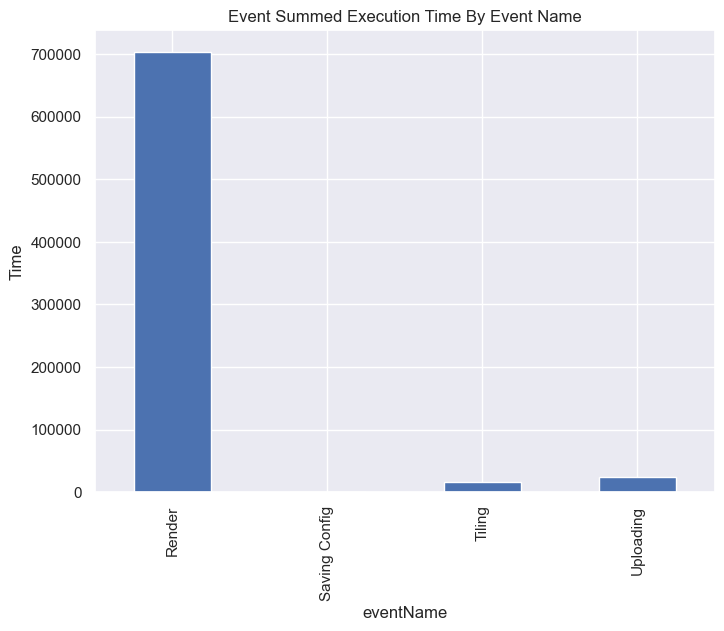

In [144]:
import time
# group by event name (except total) to find total execution times for each event
event_duration = df[df['eventName'] != 'TotalRender'].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
sum_events = event_duration.groupby(['eventName']).sum().dt.total_seconds().plot(kind = 'bar')
plt.ylabel('Time')
plt.title('Event Summed Execution Time By Event Name')
plt.rcParams['figure.figsize'] = [8, 6]
plt.savefig('Documents/sum.png')

In [146]:
# Storing gpu temp and power as x and y variable for plotting
x = df_gpu.gpuTempC
y = df_gpu.powerDrawWatt

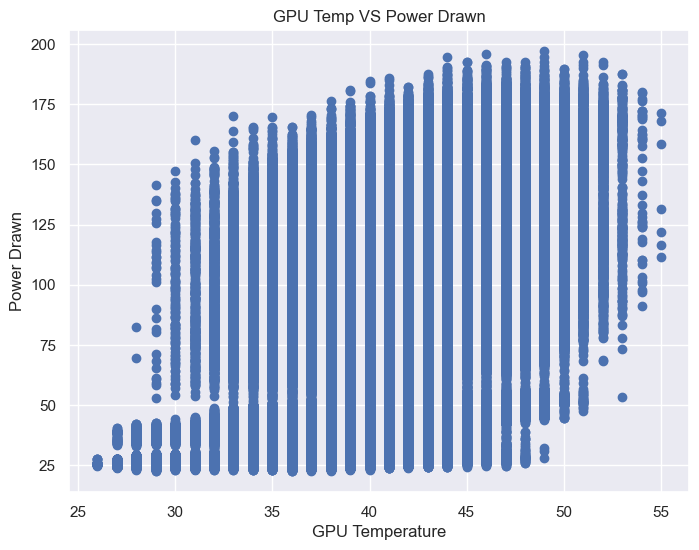

In [147]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('Power Drawn')
plt.title('GPU Temp VS Power Drawn')

# Defining chart size
plt.rcParams['figure.figsize'] = [8, 6]

plt.show()

In [148]:
# Storing gpu memory utility % and utility % as x and y variable for plotting
x = df_gpu.gpuMemUtilPerc
y = df_gpu.gpuUtilPerc

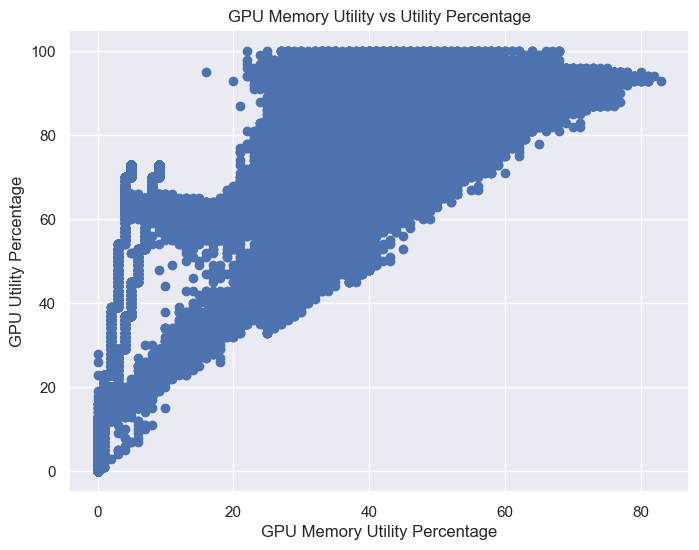

In [149]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Memory Utility vs Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [38]:
# Storing gpu memory utility % and utility % as x and y variable for plotting
x = df_gpu.gpuTempC
y = df_gpu.gpuUtilPerc

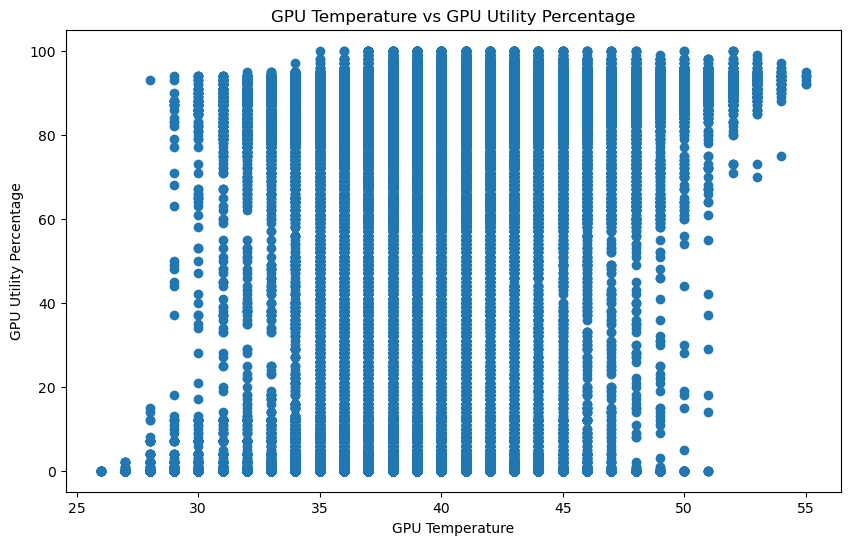

In [39]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Temperature vs GPU Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/mem-utility.png')
plt.show()

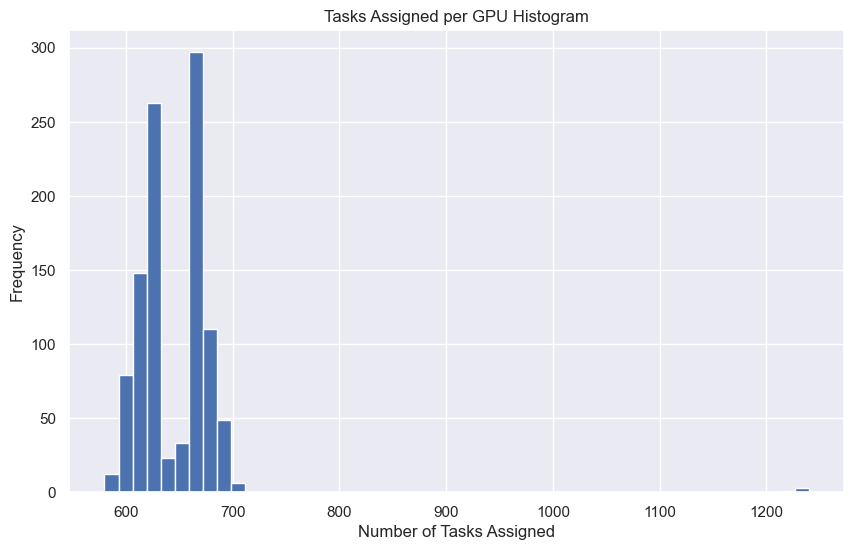

In [150]:
df_app_task['hostname'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned per GPU Histogram')
plt.rcParams['figure.figsize'] = [8, 6]
# plt.savefig('/tasks-histo.png') # save figure
plt.show()


In [55]:
df_gpu.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06
mean,3.239836e+11,8.919851e+01,4.007562e+01,6.305822e+01,3.341360e+01
std,1.228836e+09,3.975741e+01,3.800256e+00,4.144813e+01,2.300106e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


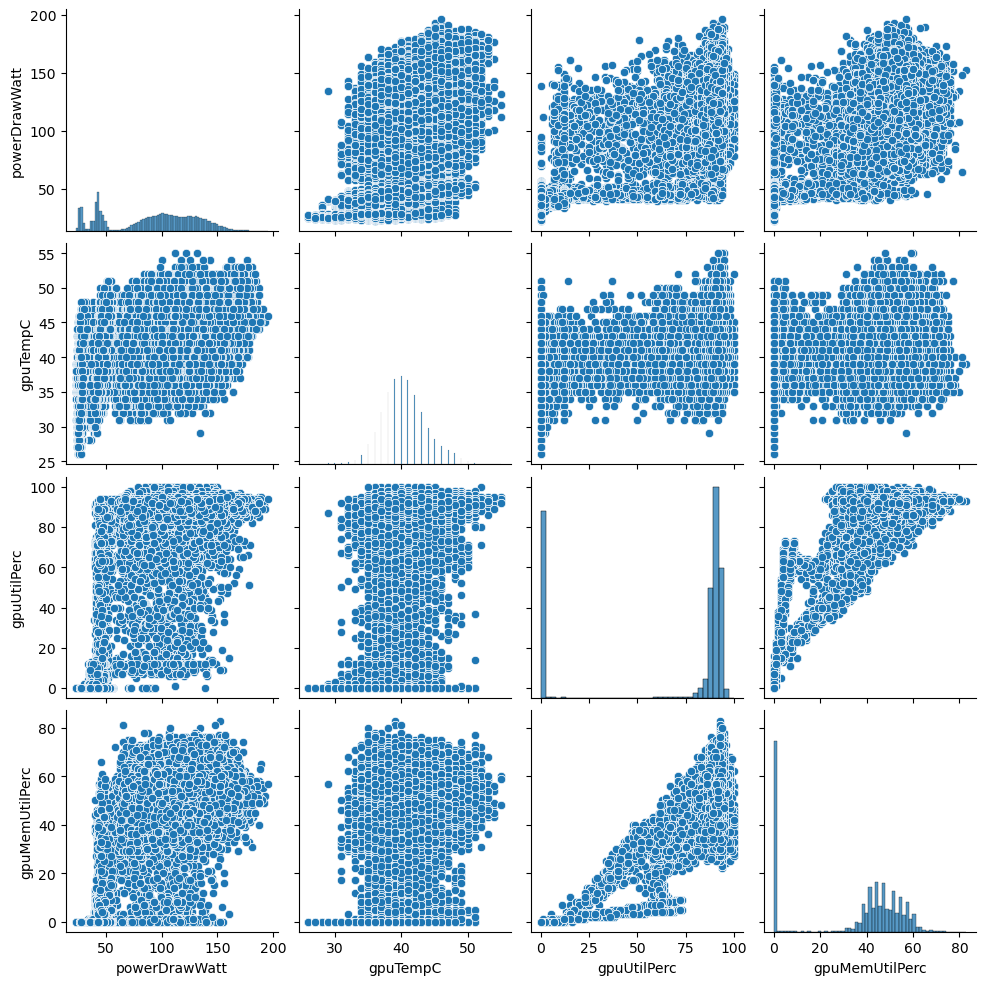

In [84]:
matrix_corr = df_merged.iloc[:,4:8]
sns.pairplot(matrix_corr)

                powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc
powerDrawWatt        1.000000  0.537190     0.862673        0.870746
gpuTempC             0.537190  1.000000     0.505906        0.492783
gpuUtilPerc          0.862673  0.505906     1.000000        0.966571
gpuMemUtilPerc       0.870746  0.492783     0.966571        1.000000


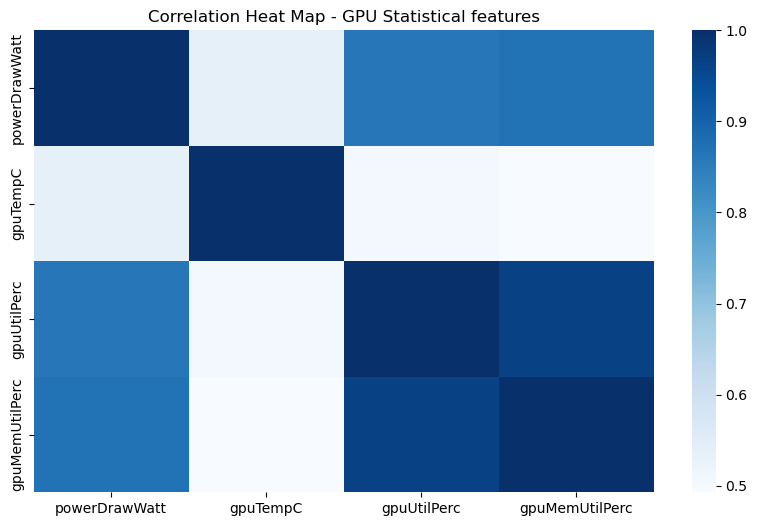

In [117]:
# Seperating numerical columns needed to find correlation
gpu_corr = df_gpu.iloc[:,4:8]

# Finding correlation
print(gpu_corr.corr())

# Plotting Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(gpu_corr.corr(),cmap='Blues',annot=False)
plt.title('Correlation Heat Map - GPU Statistical features')
plt.show()

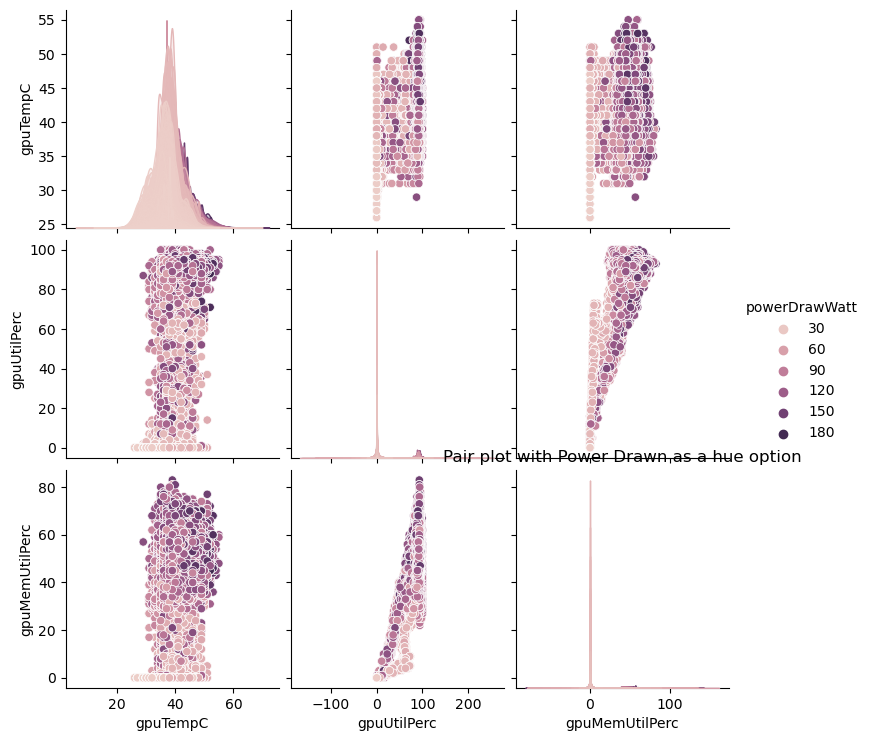

In [85]:
sns.pairplot(matrix_corr, hue ='powerDrawWatt')
plt.title("Pair plot with Power Drawn as a hue option")
plt.show()

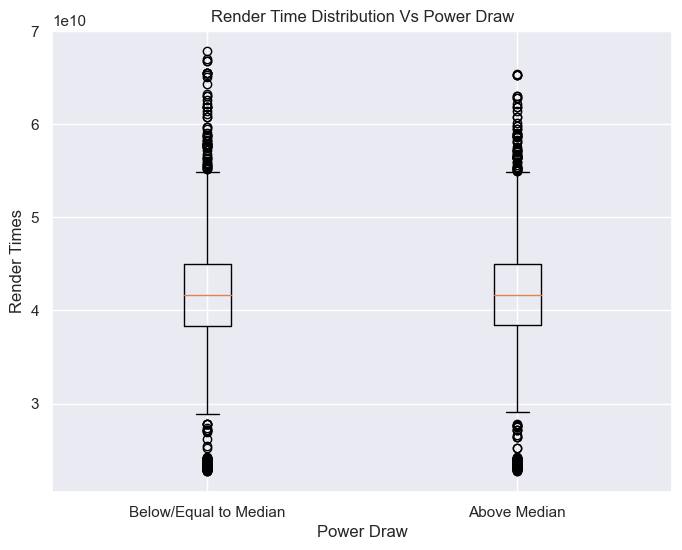

In [151]:
#Render Execution Times By Power Draw

power_median = statistics.median(df['powerDrawWatt_x'])

render_deltas_under = df[
(df['powerDrawWatt_x'] <= power_median) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

render_deltas_above = df[
(df['powerDrawWatt_x'] > power_median) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

plt.boxplot([render_deltas_under.sum(), render_deltas_above.sum()])
# labels
plt.title('Render Time Distribution Vs Power Draw')
plt.ylabel('Render Times')
plt.xlabel('Power Draw')
median_label = ['Below/Equal to Median', 'Above Median']

plt.xticks([1,2], median_label)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()


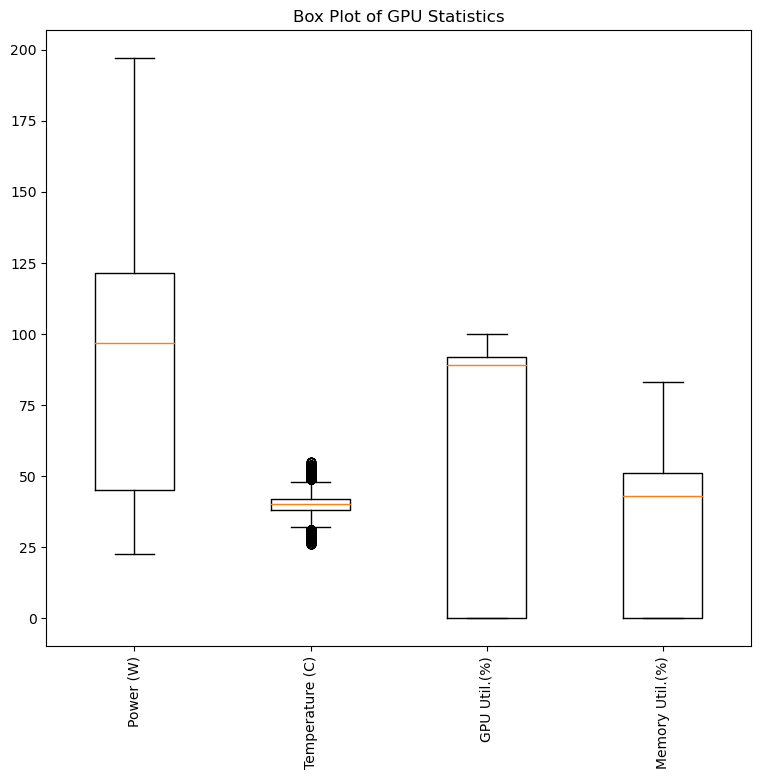

In [119]:
#Analyzing GPU Hardware performance visually
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([df_gpu['powerDrawWatt'], df_gpu['gpuTempC'],
df_gpu['gpuUtilPerc'], df_gpu['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [8, 6]

# Saving Image
# plt.savefig('Images/Box-plot.png')
plt.show()

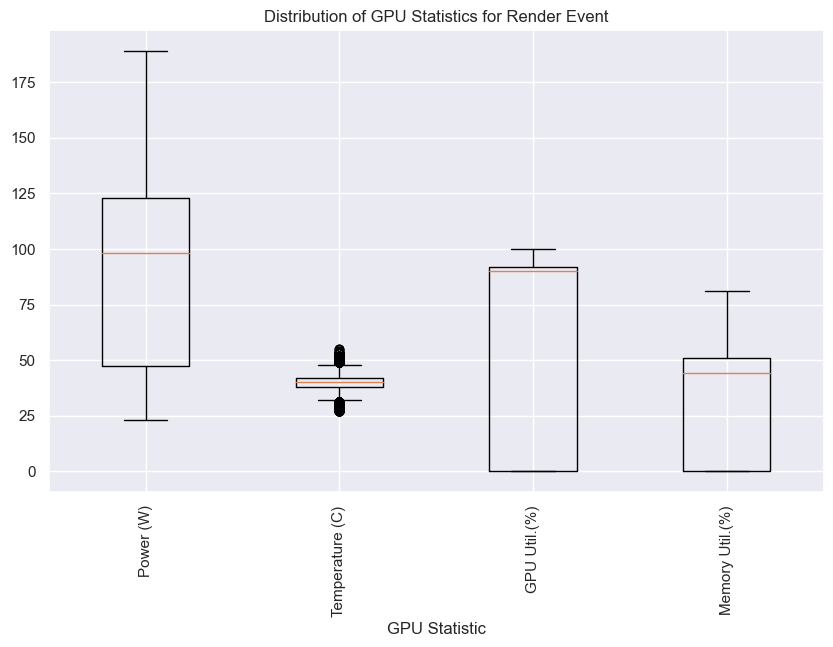

In [152]:
#GPU Statistics by Event Name
#1. Rendering:-
    
# group by statistic
plt.boxplot(
[df_merged[df_merged['eventName'] == 'Render']['powerDrawWatt'],
df_merged[df_merged['eventName'] == 'Render']['gpuTempC'],
df_merged[df_merged['eventName'] == 'Render']['gpuUtilPerc'],
df_merged[df_merged['eventName'] == 'Render']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics for Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [20, 8]
plt.show()

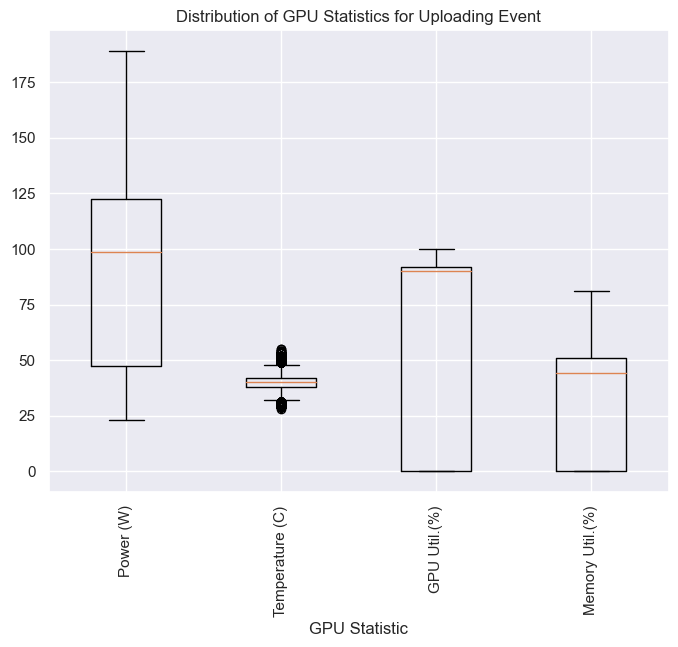

In [157]:
# group by statistic
plt.boxplot(
[df_merged[df_merged['eventName'] == 'Uploading']['powerDrawWatt'],
df_merged[df_merged['eventName'] == 'Uploading']['gpuTempC'],
df_merged[df_merged['eventName'] == 'Uploading']['gpuUtilPerc'],
df_merged[df_merged['eventName'] == 'Uploading']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics for Uploading Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

# Plotting Histogram to visualize the power consumption range

Text(0.5, 0, 'Power Drawn (in Watts)')

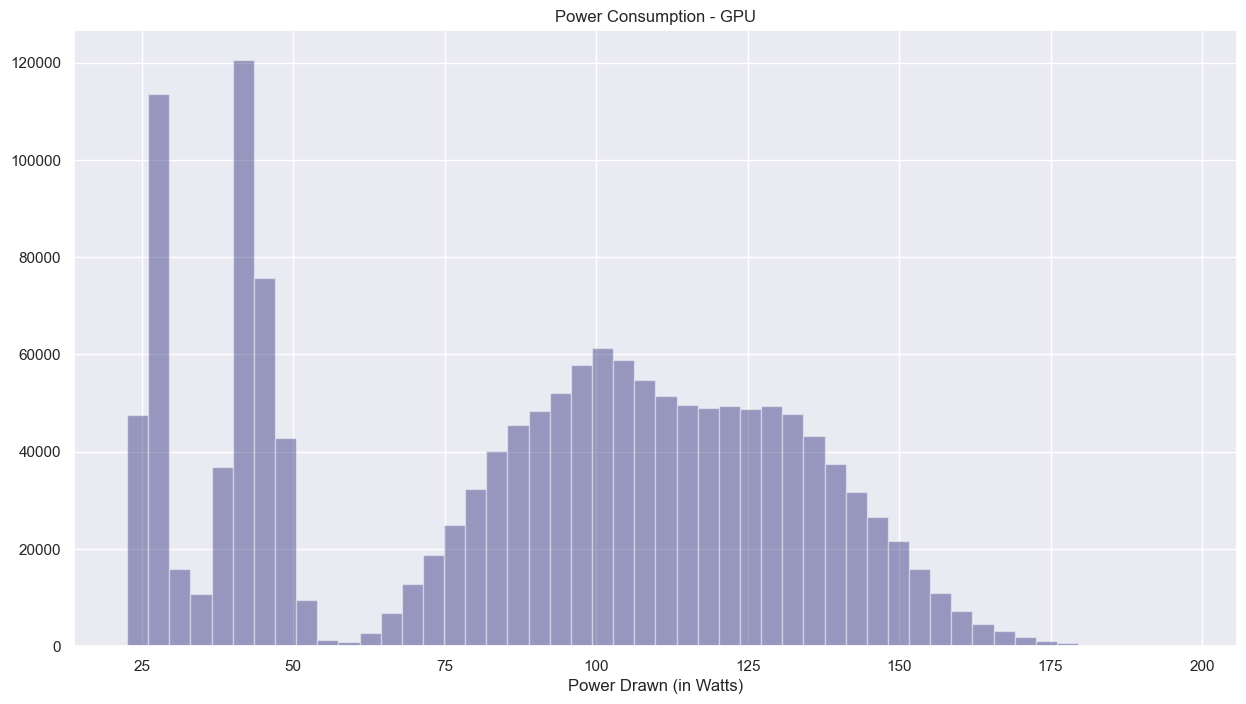

In [125]:
# Setting size and plotting chart
plt.figure(figsize=(15,8)) 
sns.set()
sns.distplot(df_gpu['powerDrawWatt'], kde = False, color = 'midnightblue', label = "Age")

# Adding Labels and Title
plt.title("Power Consumption - GPU")
plt.xlabel('Power Drawn (in Watts)')

# Saving Image
#plt.savefig('Images/Powerconsumption.png')

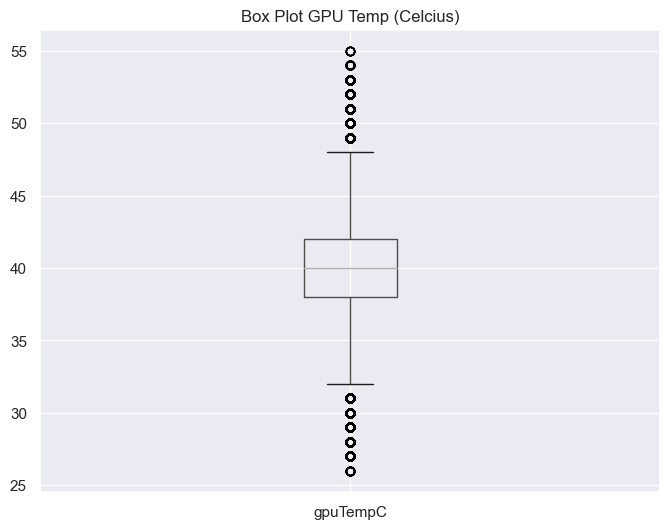

In [158]:
# Plotting box plot
df_gpu.boxplot(column = ["gpuTempC"])
plt.title('Box Plot GPU Temp (Celcius)')

# Defining chart size
plt.rcParams['figure.figsize'] = [20, 18]

# Saving Image
#plt.savefig('Images/Box-plot_gpu_temp.png')
plt.show()

In [129]:
# Displaying counts based on level
df_merged['level'].value_counts()

12    336345
8       1331
4          6
Name: level, dtype: int64

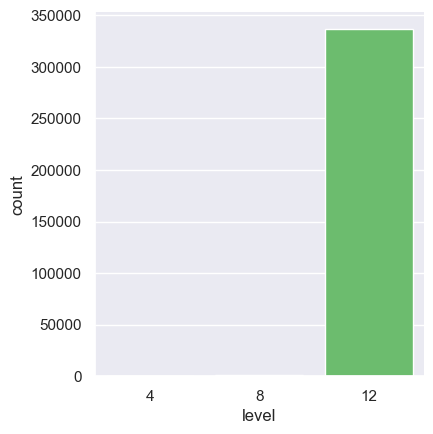

In [131]:
# Plotting level count 
sns.catplot(x='level',kind='count', data=df_merged, height=4.5, palette='viridis')

Text(0.5, 1.0, 'Task Workload')

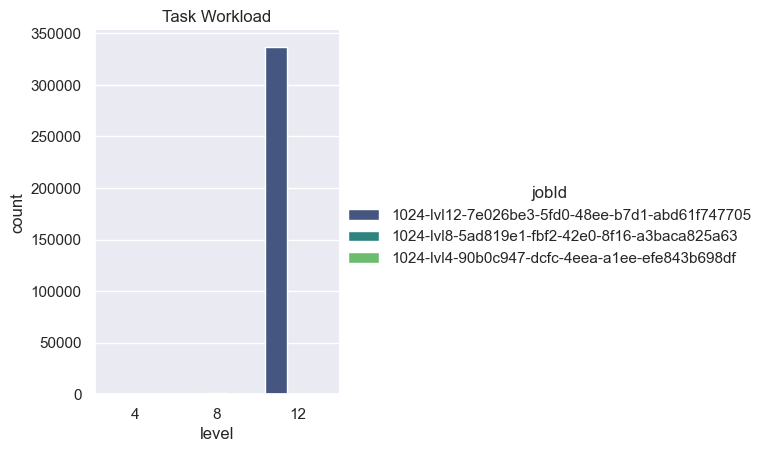

In [133]:
sns.catplot(x='level', kind='count', data=df_merged, hue = "jobId", height=4.5, palette='viridis')
plt.title("Task Workload")